In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Gaussian Elimination Functions

In [4]:
# gaussian elimination
def forward_elimination(_A,_b):
    n =  np.shape(_A)[0]
    A = np.copy(_A)
    b = np.copy(_b)
    for k in range(0,n-1):
        for i in range(k+1,n):
            m = A[i,k]/A[k,k]
            for j in range(k,n):
                #print(i, j, A[i,j], A[k,j])
                A[i,j] = A[i,j] - m*A[k,j]
            b[i] = b[i] - m*b[k]
    #print(A,b)
    return A, b

def back_substitution(A,b):
    n = np.shape(A)[0]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(n-2,-1,-1):
        #print(i)
        _sum = 0
        for j in range(n-1,i,-1):
            #print("j:", j)
            _sum += A[i,j] * x[j]
        x[i] = (b[i] - _sum) / A[i,i]
    
    #print(x)
    return x

def gaussian_elimination(_A, _b):
    A, b = forward_elimination(_A, _b)
    return back_substitution(A, b)

### Matrix for Centered Difference

In [5]:
# matrix for centered difference
def center_diff_mat(n):
    # finite difference matrix for the problem
    A = np.zeros((n,n))
    A[0,0] = -2
    A[0,1] = 1
    for i in range(1,n-1):
        A[i,i] = -2
        A[i,i-1] = 1
        A[i,i+1] = 1
    A[n-1,n-2] = 1
    A[n-1,n-1] = -2
    return A

print(center_diff_mat(2))

[[-2.  1.]
 [ 1. -2.]]


### Forward Euler

In [6]:
def forw_euler(u0 = lambda : 0, k = 0.05, h = 0.05, t_final = 1, eps = 1):
    '''
    Input
        u0  : the initial condition
        k   : the time step
        h   : the space grid size for the interval [0,1]
        T   : the final time of the marching scheme
        eps : the parameter epsilon in the heat equation
    '''
    # x grid points
    X = np.linspace(0,1,int(1/h) + 1)
    # t step points
    T = np.linspace(0, t_final, t_final * int(1/k) + 1)
    # number of grid points not including endpoints
    n = X.shape[0] - 2
    # number of timesteps
    m = T.shape[0] - 1
    # prealocate computed solution u
    u = np.zeros( (n+2, m+1) )
    # set initial condition
    u[:,0] = np.array([u0(x) for x in X])
    
    # center difference matrix
    A = center_diff_mat(n)
    
    # loop to compute u
    for i in range(0,m):
        u[1:-1, i+1] = u[1:-1,i] + (k / h**2) * eps * A @ u[1:-1,i]
    
    return u, X, T

### Backward Euler

In [7]:
def back_euler(u0 = lambda : 0, k = 0.05, h = 0.05, t_final = 1, eps = 1):
    '''
    Input
        u0  : the initial condition
        k   : the time step
        h   : the space grid size for the interval [0,1]
        T   : the final time of the marching scheme
        eps : the parameter epsilon in the heat equation
    Returns
        u   : the computed solution
        X   : the grid points where the solution was computed
        T   : the times teps where the solution was computed
    '''
    # x grid points
    X = np.linspace(0,1,int(1/h) + 1)
    # t step points
    T = np.linspace(0, t_final, t_final * int(1/k) + 1)
    # number of grid points not including endpoints
    n = X.shape[0] - 2
    # number of timesteps
    m = T.shape[0] - 1
    # prealocate computed solution u
    u = np.zeros( (n+2, m+1) )
    # set initial condition
    u[:,0] = np.array([u0(x) for x in X])
    
    # center difference matrix
    A = center_diff_mat(n)
    I = np.identity(n)
    
    # loop to compute u
    for i in range(0,m):
        for j in range(1, n+1):
            u[1:-1,i+1] = gaussian_elimination((I - (k/ h**2) * eps * A), u[1:-1,i])
    
    return u, X, T

### Parameters

In [8]:
# grid size
_h = 0.05
# timesteps
K = [0.1, 0.05, 0.025, 0.01]
# time points of interest
t = [0, 0.25, 0.5, 1.0, 2.0]

### Perform Forward Euler with initial condition $u_0(x) = \sin(\pi x)$

In [9]:
# array to store solutions for the different timesteps k
U1 = []
# initial condition u(x,0) = sin(\pi*x)
u1_0 = lambda x : np.sin(np.pi*x)

for _k in K:
    u, X, T = forw_euler(u0 = u1_0, k = _k, h = _h, t_final  = 2, eps = 0.05)
    U1.append(u)

Plot forward Euler with initial condition $u_0(x) = \sin(\pi x)$

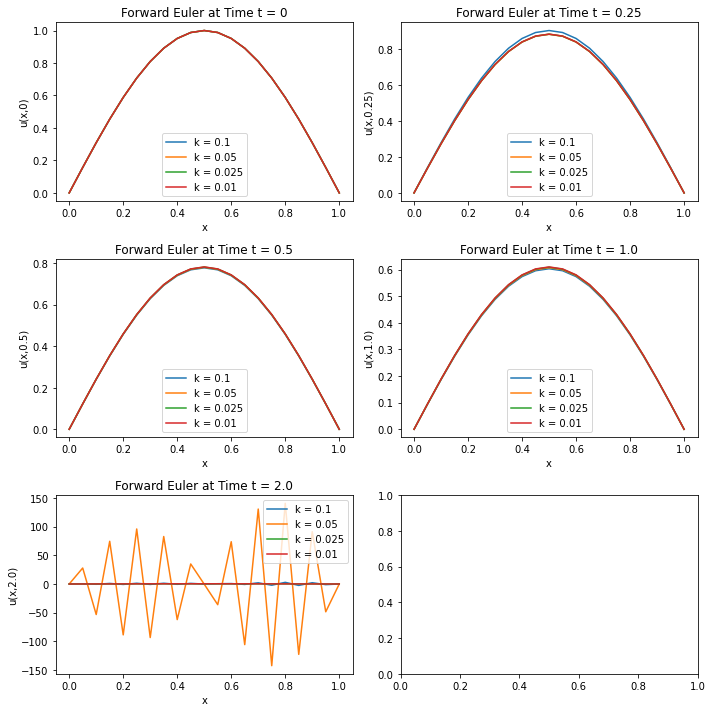

In [8]:
# plots
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
    for j in range(2):
        if (i==2 and j==1):
            break
            
        index = i*2 + j
        ax[i,j].set_title("Forward Euler at Time t = " + str(t[index]) )
        
        for r in range(len(K)):
            time_index = int( t[index] / K[r] )
            ax[i,j].plot(X, U1[r][:, time_index], label = "k = " + str(K[r]))
        
        ax[i,j].set_ylabel("u(x," + str(t[index]) + ")")
        ax[i,j].set_xlabel("x")
        ax[i,j].legend()
        
plt.tight_layout()
plt.show()

### Perform Forward Euler with initial condition $u_0(x) = 1 - 2|x-1/2|$

In [9]:
# array to store solutions for the different timesteps k
U2 = []
# initial condition u(x,0) = sin(\pi*x)
u2_0 = lambda x : 1 - 2 * np.abs(x-0.5)

for _k in K:
    u, X, T = forw_euler(u0 = u2_0, k = _k, h = _h, t_final  = 2, eps = 0.05)
    U2.append(u)

Plot forward Euler with initial condition $u_0(x) = 1 - 2|x-1/2|$

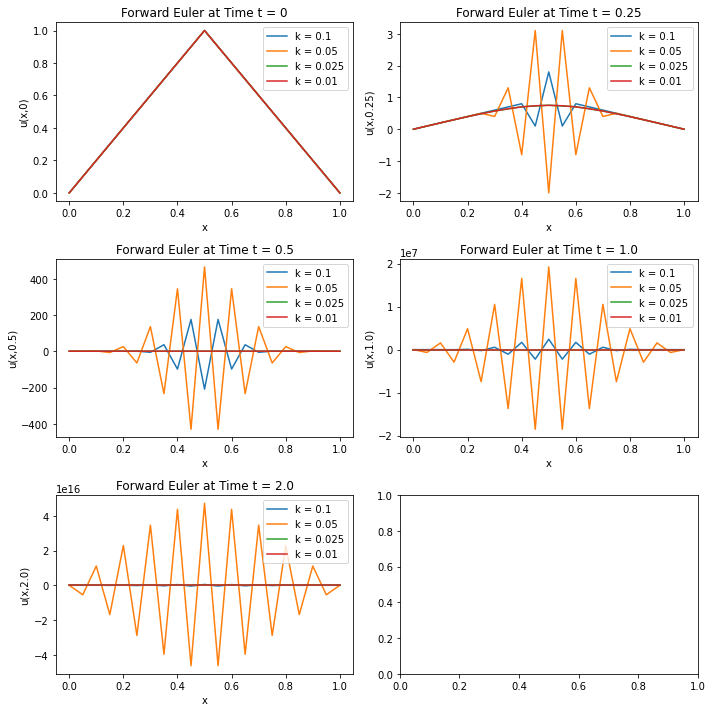

In [10]:
# plots
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
    for j in range(2):
        if (i==2 and j==1):
            break
            
        index = i*2 + j
        ax[i,j].set_title("Forward Euler at Time t = " + str(t[index]) )
        
        for r in range(len(K)):
            time_index = int( t[index] / K[r] )
            ax[i,j].plot(X, U2[r][:, time_index], label = "k = " + str(K[r]))
        
        ax[i,j].set_ylabel("u(x," + str(t[index]) + ")")
        ax[i,j].set_xlabel("x")
        ax[i,j].legend()
        
plt.tight_layout()
plt.show()

### Perform Backward Euler with initial condition $u_0(x) = \sin(\pi x)$

In [29]:
# array to store solutions for the different timesteps k
U1_back = []
# initial condition u(x,0) = sin(\pi*x)
u1_0 = lambda x : np.sin(np.pi*x)

for _k in K:
    u, X, T = back_euler(u0 = u1_0, k = _k, h = _h, t_final  = 2, eps = 0.05)
    U1_back.append(u)

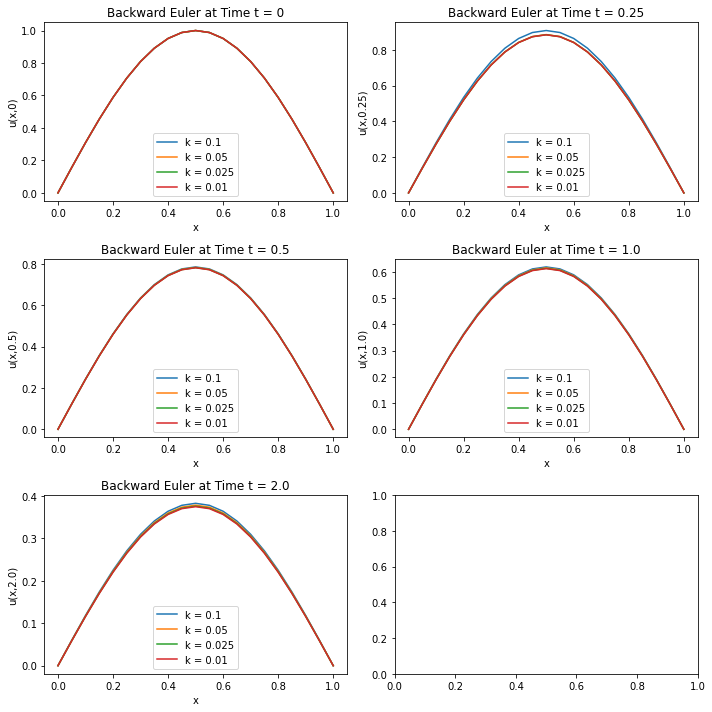

In [30]:
# plots
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
    for j in range(2):
        if (i==2 and j==1):
            break
            
        index = i*2 + j
        ax[i,j].set_title("Backward Euler at Time t = " + str(t[index]) )
        
        for r in range(len(K)):
            time_index = int( t[index] / K[r] )
            ax[i,j].plot(X, U1_back[r][:, time_index], label = "k = " + str(K[r]))
        
        ax[i,j].set_ylabel("u(x," + str(t[index]) + ")")
        ax[i,j].set_xlabel("x")
        ax[i,j].legend()
        
plt.tight_layout()
plt.show()

### Perform Backward Euler with initial condition $u_0(x) = 1 - 2|x-1/2|$

In [31]:
# array to store solutions for the different timesteps k
U2_back = []
# initial condition u(x,0) = sin(\pi*x)
u2_0 = lambda x : 1 - 2 * np.abs(x-0.5)

for _k in K:
    u, X, T = back_euler(u0 = u2_0, k = _k, h = _h, t_final  = 2, eps = 0.05)
    U2_back.append(u)

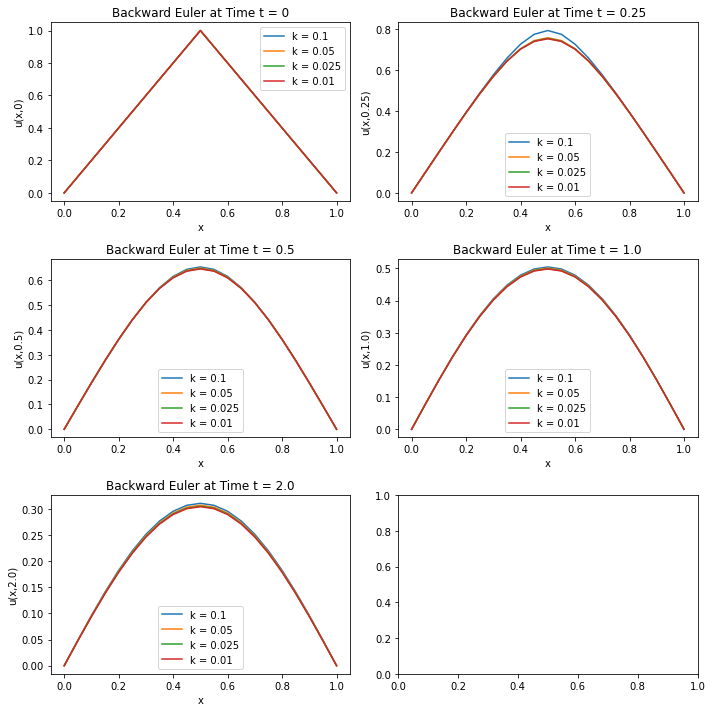

In [32]:
# plots
fig, ax = plt.subplots(3,2, figsize = (10,10))
for i in range(3):
    for j in range(2):
        if (i==2 and j==1):
            break
            
        index = i*2 + j
        ax[i,j].set_title("Backward Euler at Time t = " + str(t[index]) )
        
        for r in range(len(K)):
            time_index = int( t[index] / K[r] )
            ax[i,j].plot(X, U2_back[r][:, time_index], label = "k = " + str(K[r]))
        
        ax[i,j].set_ylabel("u(x," + str(t[index]) + ")")
        ax[i,j].set_xlabel("x")
        ax[i,j].legend()
        
plt.tight_layout()
plt.show()